In [39]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd

def get_soup(url):
    response = requests.get(url)
    response.encoding = response.apparent_encoding
    html = response.text
    return BeautifulSoup(html, 'html.parser')

def get_driver(headless=True):
    if headless:
        options = Options()
        options.add_argument('--headless')
        driver = webdriver.Chrome('./chromedriver', chrome_options=options)
    else:
        driver =  webdriver.Chrome('./chromedriver')
    return driver

In [73]:
url = 'https://translate.google.co.jp/?hl=ja&sl=ja&tl=ko&text=ねぎ&op=translate'

In [74]:
driver = get_driver(url)

/Users/s.motomura/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: use options instead of chrome_options
  app.launch_new_instance()


In [71]:
dest_word = driver.find_element_by_xpath('/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span').text
driver.close()

In [72]:
dest_word

'파'

In [412]:
lang_elems_html = '<div class="vnyljd">すべての言語</div><div class="ordo2" jsname="sgblj" data-language-code="is" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アイスランド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ga" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アイルランド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="az" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アゼルバイジャン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="af" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アフリカーンス語</div></div><div class="ordo2" jsname="sgblj" data-language-code="am" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アムハラ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ar" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アラビア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sq" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アルバニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="hy" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">アルメニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="it" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">イタリア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="yi" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">イディッシュ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ig" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">イボ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="id" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">インドネシア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ug" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ウイグル語</div></div><div class="ordo2" jsname="sgblj" data-language-code="cy" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ウェールズ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="uk" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ウクライナ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="uz" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ウズベク語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ur" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ウルドゥ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="et" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">エストニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="eo" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">エスペラント語</div></div><div class="ordo2" jsname="sgblj" data-language-code="nl" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">オランダ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="or" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">オリヤ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="kk" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">カザフ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ca" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">カタルーニャ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="gl" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ガリシア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="kn" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">カンナダ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="rw" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">キニヤルワンダ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="el" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ギリシャ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ky" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">キルギス語</div></div><div class="ordo2" jsname="sgblj" data-language-code="gu" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">グジャラト語</div></div><div class="ordo2" jsname="sgblj" data-language-code="km" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">クメール語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ku" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">クルド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="hr" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">クロアチア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="xh" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">コーサ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="co" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">コルシカ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sm" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">サモア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="jw" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ジャワ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ka" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ジョージア（グルジア）語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sn" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ショナ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sd" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">シンド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="si" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">シンハラ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sv" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スウェーデン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="zu" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ズールー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="gd" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スコットランド ゲール語</div></div><div class="ordo2" jsname="sgblj" data-language-code="es" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スペイン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sk" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スロバキア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sl" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スロベニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sw" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スワヒリ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="su" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">スンダ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ceb" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">セブアノ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="sr" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">セルビア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="st" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ソト語</div></div><div class="ordo2" jsname="sgblj" data-language-code="so" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ソマリ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="th" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">タイ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="tl" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">タガログ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="tg" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">タジク語</div></div><div class="ordo2" jsname="sgblj" data-language-code="tt" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">タタール語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ta" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">タミル語</div></div><div class="ordo2" jsname="sgblj" data-language-code="cs" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">チェコ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ny" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">チェワ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="te" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">テルグ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="da" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">デンマーク語</div></div><div class="ordo2" jsname="sgblj" data-language-code="de" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ドイツ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="tk" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">トルクメン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="tr" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">トルコ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ne" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ネパール語</div></div><div class="ordo2" jsname="sgblj" data-language-code="no" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ノルウェー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ht" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ハイチ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ha" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ハウサ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ps" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">パシュト語</div></div><div class="ordo2" jsname="sgblj" data-language-code="eu" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">バスク語</div></div><div class="ordo2" jsname="sgblj" data-language-code="haw" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ハワイ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="hu" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ハンガリー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="pa" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">パンジャブ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="hi" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ヒンディー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="fi" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">フィンランド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="fr" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">フランス語</div></div><div class="ordo2" jsname="sgblj" data-language-code="fy" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">フリジア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="bg" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ブルガリア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="vi" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ベトナム語</div></div><div class="ordo2" jsname="sgblj" data-language-code="iw" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ヘブライ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="be" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ベラルーシ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="fa" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ペルシャ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="bn" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ベンガル語</div></div><div class="ordo2" jsname="sgblj" data-language-code="pl" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ポーランド語</div></div><div class="ordo2" jsname="sgblj" data-language-code="bs" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ボスニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="pt" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ポルトガル語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mi" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マオリ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mk" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マケドニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mr" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マラーティー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mg" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マラガシ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ml" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マラヤーラム語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mt" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マルタ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ms" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">マレー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="my" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ミャンマー語</div></div><div class="ordo2" jsname="sgblj" data-language-code="mn" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">モンゴル語</div></div><div class="ordo2" jsname="sgblj" data-language-code="hmn" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">モン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="yo" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ヨルバ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="lo" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ラオ語</div></div><div class="ordo2" jsname="sgblj" data-language-code="la" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ラテン語</div></div><div class="ordo2" jsname="sgblj" data-language-code="lv" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ラトビア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="lt" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">リトアニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ro" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ルーマニア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="lb" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ルクセンブルク語</div></div><div class="ordo2" jsname="sgblj" data-language-code="ru" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">ロシア語</div></div><div class="ordo2" jsname="sgblj" data-language-code="en" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">英語</div></div><div class="ordo2 RCaXn" jsname="sgblj" data-language-code="ko" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">韓国語</div></div><div class="ordo2" jsname="sgblj" data-language-code="zh-CN" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">中国語</div></div><div class="ordo2 RCaXn KKjvXb" jsname="sgblj" data-language-code="ja" tabindex="0"><div class="ltCBQb"><i class="material-icons-extended VfPpkd-kBDsod g3XDjb" aria-hidden="true" lang="">check</i><i class="material-icons-extended VfPpkd-kBDsod W5jNxd" aria-hidden="true" lang="">history</i></div><div class="PxXj2d" jsname="Lm8Uhb">日本語</div></div>'
lang_soup = BeautifulSoup(lang_elems_html, 'html.parser')

In [413]:
lang_codes = [elem['data-language-code'] for elem in lang_soup.select('.ordo2')]

In [4]:
lang_jps = [elem.select('div')[-1].text for elem in lang_soup.select('.ordo2')]

In [49]:
def translate_from_jp(word, dests):
    driver = get_driver(False)
    dest_words = []
    for dest in dests:
        url = f'https://translate.google.co.jp/?hl=ja&sl=ja&tl={dest}&text={word}&op=translate'
        driver.get(url)
        time.sleep(1.0)
        dest_word = driver.find_element_by_xpath('/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span').text    
        dest_words.append(dest_word)
    driver.close()
    return dest_words

In [50]:
negi = translate_from_jp('ねぎ', lang_codes)
aonegi = translate_from_jp('青ねぎ', lang_codes)
tamanegi = translate_from_jp('玉ねぎ', lang_codes)

In [51]:
ja_langs = [f"{lang_jp}-{lang_code}" for lang_code, lang_jp in zip(lang_codes, lang_jps)]
df_negi_tamanegi = pd.DataFrame({'ねぎ': negi, '玉ねぎ': tamanegi}, index=ja_langs)
df_aonegi_tamanegi = pd.DataFrame({'青ねぎ': aonegi, '玉ねぎ': tamanegi}, index=ja_langs)

In [53]:
df_negi_tamanegi.to_csv('negi_tamanegi.csv')
df_aonegi_tamanegi.to_csv('aonegi_tamanegi.csv')

In [449]:
negi_based_lang_codes, negi_based_lang_jps = [], []
tamanegi_based_lang_codes, tamanegi_based_lang_jps = [], []
other_lang_codes, other_lang_jps = [], []
lang_code_to_negi, lang_code_to_tamanegi = {}, {}

for negi_str, tamanegi_str, lang_code, lang_jp in zip(negi, tamanegi, lang_codes, lang_jps):
    negi_str, tamanegi_str = negi_str.lower(), tamanegi_str.lower()
    lang_code_to_negi[lang_code], lang_code_to_tamanegi[lang_code] = negi_str, tamanegi_str
    if negi_str in tamanegi_str:
        negi_based_lang_codes.append(lang_code)
        negi_based_lang_jps.append(lang_jp)
    elif tamanegi_str in negi_str:
        tamanegi_based_lang_codes.append(lang_code)
        tamanegi_based_lang_jps.append(lang_jp)
    else:
        other_lang_codes.append(lang_code)
        other_lang_jps.append(lang_jp)

In [421]:
_ = [print(l) for l in negi_based_lang_jps]

韓国語
中国語
日本語


In [424]:
len(tamanegi_based_lang_jps)

77

In [422]:
_ = [print(l) for l in tamanegi_based_lang_jps]

アイスランド語
アイルランド語
アゼルバイジャン語
アフリカーンス語
アムハラ語
アルバニア語
アルメニア語
イタリア語
インドネシア語
ウイグル語
ウェールズ語
ウクライナ語
ウズベク語
ウルドゥ語
エストニア語
エスペラント語
オランダ語
カザフ語
カタルーニャ語
ガリシア語
カンナダ語
キルギス語
グジャラト語
クロアチア語
コルシカ語
ジャワ語
ジョージア（グルジア）語
シンハラ語
スウェーデン語
スコットランド ゲール語
スペイン語
スロバキア語
スロベニア語
スワヒリ語
スンダ語
セブアノ語
セルビア語
ソマリ語
タイ語
タガログ語
タジク語
タミル語
チェコ語
チェワ語
テルグ語
デンマーク語
ドイツ語
トルクメン語
トルコ語
ネパール語
ノルウェー語
ハイチ語
パシュト語
バスク語
ハンガリー語
パンジャブ語
ヒンディー語
フィンランド語
フランス語
フリジア語
ブルガリア語
ヘブライ語
ペルシャ語
ベンガル語
ポーランド語
ボスニア語
ポルトガル語
マケドニア語
マラーティー語
マラヤーラム語
マレー語
モンゴル語
ヨルバ語
ラオ語
ラテン語
ロシア語
英語


In [425]:
len(other_lang_jps)

28

In [426]:
_ = [print(l) for l in other_lang_jps]

アラビア語
イディッシュ語
イボ語
オリヤ語
キニヤルワンダ語
ギリシャ語
クメール語
クルド語
コーサ語
サモア語
ショナ語
シンド語
ズールー語
ソト語
タタール語
ハウサ語
ハワイ語
ベトナム語
ベラルーシ語
マオリ語
マラガシ語
マルタ語
ミャンマー語
モン語
ラトビア語
リトアニア語
ルーマニア語
ルクセンブルク語


In [326]:
url = 'https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes'
soup = get_soup(url)

In [340]:
code_to_lang = {}
code2_to_code3 = {} # 639-1 -> 639-3（後の地図の描画で使う）
for row in soup.select('.wikitable')[0].select('tr')[1:]:
    _, _lang_fam, lang, _native_name, code, _code2t, _code2b, code3, _notes = row.select('td')
    lang, code = lang.text.lower().split(',')[0].split('(')[0].strip(), code.text
    code_to_lang[code] = lang
    code2_to_code3[code] = code3.text.split('\xa0')[0].strip().upper()

In [160]:
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'
soup = get_soup(url)

In [161]:
lang_to_pop = {}
for row in soup.select('.wikitable')[0].select('tr')[1:]:
    _rank, lang, n_speakers, _percentage, _lang_fam, _branch = row.select('td')
    lang, n_speakers = lang.text.lower().split('[')[0].split('(')[0].strip(), float(n_speakers.text)
    lang_to_pop[lang] = n_speakers

In [427]:
negi_pop = 0
for code in negi_based_lang_codes:
    code = code.lower().split('-')[0]
    if code not in code_to_lang: continue
    lang = code_to_lang[code]
    if 'chinese' in lang: 
        lang = 'mandarin chinese'
    if lang not in lang_to_pop: continue
    print(lang)
    pop = lang_to_pop[lang]
    negi_pop += pop
negi_pop    

korean
mandarin chinese
japanese


1123.3

In [428]:
tamanegi_pop = 0
for code in tamanegi_based_lang_codes:
    code = code.lower()
    if code not in code_to_lang: continue
    lang = code_to_lang[code]
    if lang not in lang_to_pop: continue
    pop = lang_to_pop[lang]
    print(lang)
    tamanegi_pop += pop
tamanegi_pop

amharic
italian
indonesian
ukrainian
urdu
dutch
kazakh
kannada
gujarati
spanish
somali
thai
tagalog
tamil
czech
telugu
german
turkish
nepali
hungarian
hindi
french
bengali
polish
portuguese
marathi
malayalam
yoruba
russian
english


2852.0

In [429]:
other_pop = 0
for code in other_lang_codes:
    code = code.lower()
    if code not in code_to_lang: continue
    lang = code_to_lang[code]
    if lang not in lang_to_pop: continue
    print(lang)
    pop = lang_to_pop[lang]
    other_pop += pop
other_pop    

igbo
kinyarwanda
greek
sindhi
zulu
hausa
vietnamese
burmese
romanian


266.0

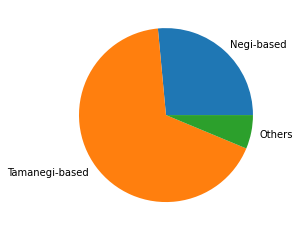

In [430]:
import matplotlib.pyplot as plt

plt.pie([negi_pop, tamanegi_pop, other_pop], labels=['Negi-based', 'Tamanegi-based', 'Others'])
plt.savefig('population_pie.png')

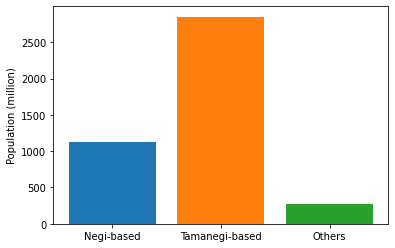

In [431]:
plt.bar([1, 2, 3], [negi_pop, tamanegi_pop, other_pop], tick_label=['Negi-based', 'Tamanegi-based', 'Others'], align='center', color=['tab:blue', 'tab:orange', 'tab:green'])
plt.ylabel('Population (million)')
plt.savefig('population_bar.png')

In [351]:
import pycountry

In [350]:
url = 'https://wiki.openstreetmap.org/wiki/Nominatim/Country_Codes'
soup = get_soup(url)

In [456]:
import geopandas as gpd
geojson = './countries.geo.json'
gdf = gpd.read_file(geojson)
gdf['ねぎ'] = ''
gdf['玉ねぎ'] = ''

In [464]:
negi_countries = []
for lang_code in negi_based_lang_codes:
    lang_code = 'zh-hans' if lang_code == 'zh-CN' else lang_code
    countries = *lang_code_to_country_code[lang_code],
    for c in countries:
        negi_countries.append(c)
        lang_code = 'zh-CN' if lang_code == 'zh-hans' else lang_code
        gdf.loc[gdf['id']==c, 'ねぎ'] = lang_code_to_negi[lang_code]
        gdf.loc[gdf['id']==c, '玉ねぎ'] = lang_code_to_tamanegi[lang_code]

In [465]:
tamanegi_countries = []
for lang_code in tamanegi_based_lang_codes:
    if lang_code not in lang_code_to_country_code: continue
    countries = *lang_code_to_country_code[lang_code],
    for c in countries:
        tamanegi_countries.append(c)
        gdf.loc[gdf['id']==c, 'ねぎ'] = lang_code_to_negi[lang_code]
        gdf.loc[gdf['id']==c, '玉ねぎ'] = lang_code_to_tamanegi[lang_code]    

In [466]:
other_countries = []
for lang_code in other_lang_codes:
    if lang_code not in lang_code_to_country_code: continue
    countries = *lang_code_to_country_code[lang_code],
    for c in countries:
        other_countries.append(c)
        gdf.loc[gdf['id']==c, 'ねぎ'] = lang_code_to_negi[lang_code]
        gdf.loc[gdf['id']==c, '玉ねぎ'] = lang_code_to_tamanegi[lang_code]      

In [470]:
m = folium.Map(location=[0, 0], zoom_start=2)

folium.GeoJson(gdf[gdf['id'].isin(negi_countries)], style_function=lambda x: {'fillColor': '#1f77b4', 'color': '#1f77b4'}, tooltip=folium.features.GeoJsonTooltip(fields=['name', 'ねぎ', '玉ねぎ'],labels=True, sticky=True)).add_to(m)
folium.GeoJson(gdf[gdf['id'].isin(tamanegi_countries)], name='玉ねぎ先行', style_function=lambda x: {'fillColor': '#ff7f0e', 'color': '#ff7f0e'},tooltip=folium.features.GeoJsonTooltip(fields=['name', 'ねぎ', '玉ねぎ'],labels=True, sticky=True)).add_to(m)
folium.GeoJson(gdf[gdf['id'].isin(other_countries)], name='その他', style_function=lambda x: {'fillColor': '#2ca02c', 'color': '#2ca02c'}, tooltip=folium.features.GeoJsonTooltip(fields=['name', 'ねぎ', '玉ねぎ'],labels=True, sticky=True)).add_to(m)
m

In [471]:
m.save('negi_tamanegi_map.html')

In [474]:
import json

with open('lang_code_to_country_code.json', 'w') as f:
    json.dump(lang_code_to_country_code, f)